# Analysis of Yelp Data


The Yelp dataset is a collection of user-generated reviews and associated data for businesses in various cities. The data includes information such as the business name, category, location, and rating, as well as the user ID and review text for each review. This data can be used to analyze patterns and trends in consumer behavior, business performance, and geographic locations. Additionally, the dataset provides an opportunity to explore the relationships between different variables, such as ratings, reviews, and business categories. This data can be leveraged to gain insights and make informed decisions in a variety of industries, including marketing, business management, and public policy.

Description of the variables of the data used here.

* __business_id__ - A unique identifier for each business in the dataset
* __business_categories__ - A list of categories associated with the business
* __business_city__ - The city where the business is located.
* __user_id__ - A unique identifier for each user who has written a review.
* __text__ - The text of the review.
* __stars__ - The user's rating towards the business
* __useful__ - The number of times the review was voted as useful.
* __date__ - The date the review was posted.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
yelp = pd.read_csv('files/Yelp_Portfolio1_Input.csv')

 # Q1. Check and remove missing data
 
### Q1.1 Write a Python code snippet that checks for missing values in each column of the dataset. If any, only display the names of the columns with missing values and their corresponding number of missing values. Print the length of the data before removing the missing data.

Note: Only output the number of missing values for the columns having at least one missing value!

In [61]:
# your code and solutions
yelp.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,26/1/2011,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,27/7/2011,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
3,Active Life; Dog Parks; Parks,Scottsdale,_1QQZuf4zZOyFCvXc0o6Vg,27/5/2010,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg
4,Tires; Automotive,Mesa,6ozycU1RpktNG2-1BroVtw,5/1/2012,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw


In [7]:
yelp.shape

(229907, 8)

In [9]:
yelp.isnull()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
229902,False,False,False,False,False,False,False,False
229903,False,False,False,False,False,False,False,False
229904,False,False,False,False,False,False,False,False
229905,False,False,False,False,False,False,False,False


In [10]:
yelp.isnull().sum()

business_categories    777
business_city            0
business_id              0
date                     0
stars                    0
text                     6
useful                   0
user_id                  0
dtype: int64

In [11]:
yelp.isnull().sum().sum()

783

In [20]:
yelp.dropna()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,26/1/2011,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,27/7/2011,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
3,Active Life; Dog Parks; Parks,Scottsdale,_1QQZuf4zZOyFCvXc0o6Vg,27/5/2010,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg
4,Tires; Automotive,Mesa,6ozycU1RpktNG2-1BroVtw,5/1/2012,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw
...,...,...,...,...,...,...,...,...
229902,Gastropubs; Restaurants,Tempe,vnffHkFJbmd-J3OaBbK2Eg,14/4/2011,2,I really wanted to like this place because it'...,0,6e7pZofhDuIlD_rX2oYirQ
229903,Hotels & Travel; Event Planning & Services; Ho...,Peoria,l5oUrgQ190l8CcN8uzd_pA,23/1/2011,1,My husband I stayed here for two nights. Of c...,2,dDNfSFT0VApxPmURclX6_g
229904,Pubs; Bars; American (Traditional); Nightlife;...,Tempe,#NAME?,11/10/2010,4,Cool atmosphere. A lot of beers on tap and goo...,0,M5wHt6Odh1k5v0tIjqd8DQ
229905,Wine Bars; Bars; Pizza; Nightlife; Restaurants,Tempe,YQvg0JCGRFUkb6reMMf3Iw,18/1/2011,3,I have to take a star off for the spotty servi...,2,jopndPrv-H5KW2CfScnw9A


### Q1.2 Remove any row that contains at least one missing value, and output the length of the resulting cleaned dataset; After that, remove any row that contain invalid value with either "#NAME?" or "#VALUE!" in the `business_id` and `user_id` columns, and output the length of the resulting cleaned dataset.

In [55]:
# your code and solutions
yelp1 = yelp.loc[yelp['business_id'] == '#NAME?']
yelp1 = yelp.loc[yelp['user_id'] == '#VALUE!']
yelp1.shape()

TypeError: 'tuple' object is not callable

# Q2. Random Subset Selection of Yelp Businesses by City

Selecting a random subset of cities from the Yelp business dataset and extracting all the rows corresponding to businesses located in those cities can be useful for various purposes. For example, it can be used to 
perform exploratory data analysis on a smaller subset of the dataset, which can be more manageable and faster to process than the entire dataset. Suppose you want to select a random subset of 10 cities from the dataset and extract all the rows that correspond to businesses located in those cities. At last, print the length of the resulting sample data. Write Python code that accomplishes this task.

Note: Use the $random.sample()$ function to select 10 random cities from the list of unique cities. Set the random seed to 42 before selecting the cities!!!

In [63]:
# your code and solutions
import random
print('Cities', random.sample('business_city', 10))

Cities ['e', 'i', 't', 'u', 'n', 'c', 'y', 'i', 's', 's']


# Q3. Descriptive statistics on the data output from Q2
### Q3.1 Compute summary statistics for the `stars` column of the sample data
Note: the resulting output includes the count, mean, standard deviation, minimum, maximum values of the column.

In [34]:
# your code and solutions
print(yelp1['stars'].count())
print(yelp1['stars'].mean())
print(yelp1['stars'].std())
print(yelp1['stars'].min())
print(yelp1['stars'].max())

229124
3.7678418672858367
1.2155579342753824
1
5


### Q3.2 For each city in the dataframe, how many unique businesses are there?

Note: the resulting dataframe has two columns: `business_city` and `count`. Compute summary statistics (similar as Q 3.1) for the `count` column.

In [72]:
# your code and solutions
yelp1$business_city.nunique()

SyntaxError: invalid syntax (3893978286.py, line 2)

In [68]:
print(yelp1['count'].count())
print(yelp1['count'].mean())
print(yelp1['count'].std())
print(yelp1['count'].min())
print(yelp1['count'].max())

KeyError: 'count'

### Q3.3 For each business category and business ID combination in the dataframe, how many unique users have rated the business?

Note: the resulting dataframe has three columns: `business_categories`, `business_id`, and `count`. Compute summary statistics (similar as Q 3.1) for the `count` column.

In [73]:
# your code and solutions
yelp1$business_categories.nunique()

SyntaxError: invalid syntax (169647458.py, line 2)

In [74]:
print(yelp1['count'].count())
print(yelp1['count'].mean())
print(yelp1['count'].std())
print(yelp1['count'].min())
print(yelp1['count'].max())

KeyError: 'count'

# Q4. Plotting and Analysis

Explore the distribution of each variable, or the correlation between the `business_city`, `useful`,`business_categories` or `other variables` and the `stars` column in both the cleaned dataset from Q1 and the sampled dataset from Q2. For instance, does some cities tend to provide higher stars than others? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___).
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the Yelp data.

Analysis and observation are open, and require you to think critically and analyze data to develop your own insights and conclusions. It's important for you to analyze the data, identify patterns, draw your own conclusions, and communicate your findings. This fosters critical thinking skills, ownership of learning, and a deeper understanding of the data.

<AxesSubplot:xlabel='useful', ylabel='stars'>

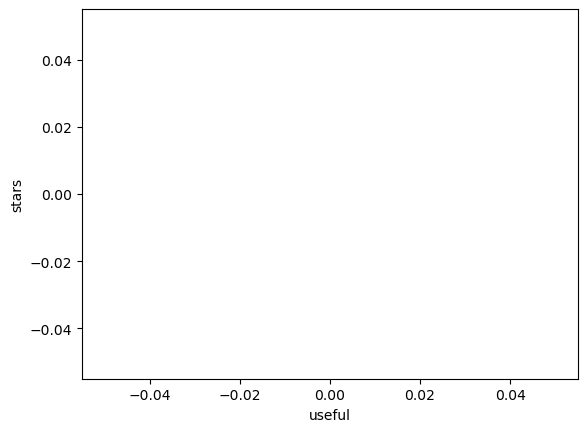

In [58]:
# your code and solutions
plt.yelp1